# Evaluation of Jeopardy Questions

We want to compete on Jeopardy. To help us gain an edge over our potential competitors, we will analyse a dataset of questions to see if there are any patterns.

Our dataset is the first 20000 rows from [this full dataset](https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file) of Jeopardy questions.

# Clean

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('jeopardy.csv')

In [12]:
df.sort_values(' Value')

,Show Number,Air Date,Round,Category,Value,Question,Answer
14836,4511,2004-03-29,Double Jeopardy!,ALL MY LIFE,"$1,000","Born in Connecticut in 1800, helped capture an...",John Brown
9308,3820,2001-03-23,Double Jeopardy!,BRITISH NOBILITY,"$1,000","As a boy in 1461, the future King Richard III ...",Gloucester
15018,3731,2000-11-20,Double Jeopardy!,THE AMERICAN REVOLUTION,"$1,000",Guerrilla leader Francis Marion earned this ni...,"""The Swamp Fox"""
4697,5419,2008-03-13,Jeopardy!,ALL MY SONS,"$1,000",Egypt is sometimes called the land of this fer...,Ham
18875,5253,2007-06-13,Jeopardy!,LEAGUES,"$1,000",This organization was founded in 1920 by Carri...,the League of Women Voters
...,...,...,...,...,...,...,...
12304,5332,2007-11-13,Final Jeopardy!,THE MOVIES,None,The title of this award-winning 1963 film refe...,8½
1247,1302,1990-04-10,Final Jeopardy!,CABLE TELEVISION,None,The name of this channel can be traced back to...,Nickelodeon
2801,3815,2001-03-16,Final Jeopardy!,SPORTS NAME ORIGINS,None,This racket sport takes its name from the coun...,Badminton
16107,5001,2006-05-15,Final Jeopardy!,MYTHOLOGY,None,The name of this monster is from the Greek for...,the Chimera


In [9]:
df.loc[np.random.permutation(df.index)]

,Show Number,Air Date,Round,Category,Value,Question,Answer
11708,2903,1997-03-26,Double Jeopardy!,YOUTH ORGANIZATIONS,$600,"A team from Williamsport, PA. won this athleti...",Little League
8894,6293,2012-01-18,Double Jeopardy!,BARTLETT'S PAIRS,$1600,"The 2 quotes by Charles Evans Hughes, the USA'...",Chief Justice
3706,4398,2003-10-22,Jeopardy!,A TOM CRUISE FILM FESTIVAL,$200,"""I lost the Number 1 draft pick the night befo...",Jerry Maguire
8090,2679,1996-04-04,Jeopardy!,BIBLICAL WORDS & PHRASES,$500,"""Pale Horse"" is a metaphor for the approach of...",Death
12296,5332,2007-11-13,Double Jeopardy!,YOGA TIME,$1600,Yoga is mentioned in these ancient religious t...,the Vedas
...,...,...,...,...,...,...,...
5569,5173,2007-02-21,Final Jeopardy!,EXPLORERS,None,"In 1616, after Hudson died, this man became th...",(William) Baffin
10280,3205,1998-07-03,Double Jeopardy!,PEOPLE WITH FOOD NAMES,$800,"""King of the Hill""'s guitar-playing comedian C...",Carrot Top
13175,4849,2005-10-13,Double Jeopardy!,MUSIC CLASS,$1200,"In a symphony orchestra, this section of instr...",percussion
5281,5903,2010-04-21,Jeopardy!,BUSY AS A BEAVER,$600,Grey Beaver is the first master of this Jack L...,White Fang


In [3]:
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [4]:
df.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

In [5]:
# remove space from the columns
df.columns = pd.Series(df.columns).str.strip()

In [6]:
df.columns

Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')

In [7]:
import re
def normal_str(my_str):
    '''
    Normalize any string by removing all punctuation and lowercasing it.
    '''
    new_str = my_str.lower()
    return re.sub('\W',' ',new_str)
    

In [8]:
df['clean_question'] = df['Question'].apply(normal_str)
df['clean_answer'] = df['Answer'].apply(normal_str)

In [9]:
df['Air Date'] = pd.to_datetime(df['Air Date'])

In [10]:
def normal_money(my_dol):
    '''
    Normalize any number-string by removing punctuation and
    converting it to an integer
    '''
    try:
        new_dol = re.sub('\W','',my_dol)
        return int(new_dol)
    except:
        return 0

In [11]:
df['clean_value'] = df['Value'].apply(normal_money)

# Analysis

## How often can the answer be deduced from the question?

Strategy: Count how many times the answer contains words from the question.

In [12]:
def ans_v_ques(row):
    '''
    Counts how many times each word in the answer
    also occurs in the question
    '''
    split_answer = row['clean_answer'].split(' ')
    split_question = row['clean_question'].split(' ')
    
    match_count = 0
    if 'the' in split_answer:
        split_answer.remove('the')
    if len(split_answer) == 0:
        return 0
    for ans in split_answer:
        if ans in split_question:
            match_count += 1
    return match_count/(len(split_answer))

In [13]:
# apply the function to all rows
answer_in_question = df.apply(ans_v_ques, axis=1)

In [14]:
df['answer_in_question'] = answer_in_question

In [15]:
answer_in_question.mean()

0.09565366087691443

On average, 9.5% of the words in the answer are repeats from the question. While it might be useful to use the question itself as a clue for the answer, our rough estimate is that 90.5% of the questions do not explicitly hint at the answer in Jeopardy.

## How often are old questions repeated?

Strategy: Count how often words that are >6 characters in length reoccur over time.

In [16]:
df = df.sort_values('Air Date')
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_value,answer_in_question
19325,10,1984-09-21,Final Jeopardy!,U.S. PRESIDENTS,None,"Adventurous 26th president, he was 1st to ride...",Theodore Roosevelt,adventurous 26th president he was 1st to ride...,theodore roosevelt,0,0.0
19301,10,1984-09-21,Double Jeopardy!,LABOR UNIONS,$200,Notorious labor leader missing since '75,Jimmy Hoffa,notorious labor leader missing since 75,jimmy hoffa,200,0.0
19302,10,1984-09-21,Double Jeopardy!,1789,$200,"Washington proclaimed Nov. 26, 1789 this first...",Thanksgiving,washington proclaimed nov 26 1789 this first...,thanksgiving,200,0.0
19303,10,1984-09-21,Double Jeopardy!,TOURIST TRAPS,$200,Both Ferde Grofe' & the Colorado River dug thi...,the Grand Canyon,both ferde grofe the colorado river dug thi...,the grand canyon,200,0.0
19304,10,1984-09-21,Double Jeopardy!,LITERATURE,$200,"Depending on the book, he could be a ""Jones"", ...",Tom,depending on the book he could be a jones ...,tom,200,0.0


In [17]:
question_overlap = []
terms_used = set()

for index, row in df.iterrows():
    split_question = row['clean_question'].split(' ')
    split_question = [word for word in split_question if len(word)>=6]
    
    match_count = 0
    for word in split_question:
        if word in terms_used:
            match_count +=1
        terms_used.add(word)
    if len(split_question) > 0:
        question_overlap.append(round(match_count/len(split_question),2))
    else:
        question_overlap.append(0)

In [18]:
df['question_overlap'] = question_overlap

In [19]:
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_value,answer_in_question,question_overlap
19325,10,1984-09-21,Final Jeopardy!,U.S. PRESIDENTS,None,"Adventurous 26th president, he was 1st to ride...",Theodore Roosevelt,adventurous 26th president he was 1st to ride...,theodore roosevelt,0,0.0,0.0
19301,10,1984-09-21,Double Jeopardy!,LABOR UNIONS,$200,Notorious labor leader missing since '75,Jimmy Hoffa,notorious labor leader missing since 75,jimmy hoffa,200,0.0,0.0
19302,10,1984-09-21,Double Jeopardy!,1789,$200,"Washington proclaimed Nov. 26, 1789 this first...",Thanksgiving,washington proclaimed nov 26 1789 this first...,thanksgiving,200,0.0,0.0
19303,10,1984-09-21,Double Jeopardy!,TOURIST TRAPS,$200,Both Ferde Grofe' & the Colorado River dug thi...,the Grand Canyon,both ferde grofe the colorado river dug thi...,the grand canyon,200,0.0,0.5
19304,10,1984-09-21,Double Jeopardy!,LITERATURE,$200,"Depending on the book, he could be a ""Jones"", ...",Tom,depending on the book he could be a jones ...,tom,200,0.0,0.0


In [20]:
df['question_overlap'].mean()

0.721711585579279

Our process for each row was to:

1. Split the question into a list of words
2. Eliminate any words that were <6 characters long from the list
3. Create a set of words (sets only contain unique items)
4. If a word from our question exists in the set, increment the counter by 1
5. Finally, we calculate the proportion of repeated:total words. In other words (pun intended) the average number of repeated words for the question and append it to a new list.

The mean of the average-repeated-words is 0.72. On average, 72% of words >6 characters long were repeated from previous questions. 

In [21]:
df['question_overlap'].value_counts().head(10)

1.00    7110
0.50    1910
0.67    1790
0.75    1537
0.00    1515
0.80    1294
0.83     814
0.60     801
0.33     613
0.86     470
Name: question_overlap, dtype: int64

In [22]:
qo = df['question_overlap'].value_counts().reset_index()
qo.columns=['avg_repeat','number_of_questions']
qo[qo['avg_repeat']>=0.7]['number_of_questions'].sum()

12193

Approximately 7114 questions had all "long words" previously used in other questions. Furthermore, 12,204 questions out of the total 20,000 had more at least 70% of their "long words" repeated from previous questions.

Based on this information, we would recommend reviewing previous questions.

## What characterizes high value questions?

To answer this question we will find the observed and expected counts for 10 terms, then run a Chisquare to see if there are any differences.

### Observed Counts

In [23]:
df['high_value'] = df['clean_value'].apply(lambda x: 1 if x > 800 else 0)

In [24]:
def word_values(word):
    low_count = 0
    high_count = 0
    
    for index, row in df.iterrows():
        cleanq_list = row['clean_question'].split()
        if word in cleanq_list:
            if row['high_value'] == 1:
                high_count += 1
            else:
                low_count += 1
    return [high_count,low_count]

In [25]:
import random

In [26]:
random.seed(a=2)
comparison_terms = random.sample(terms_used,10, )

In [27]:
comparison_terms

['curtis',
 'indians',
 'expensive',
 'catkins',
 'recreational',
 'tierney',
 'residence',
 '22_j_30',
 '07_dj_16',
 'tuesday']

In [28]:
observed_words_count = {}
for word in comparison_terms:
    observed_words_count[word] = word_values(word)

In [29]:
observed_words_count

{'curtis': [2, 3],
 'indians': [4, 8],
 'expensive': [0, 8],
 'catkins': [1, 0],
 'recreational': [0, 1],
 'tierney': [0, 1],
 'residence': [4, 4],
 '22_j_30': [1, 0],
 '07_dj_16': [1, 0],
 'tuesday': [0, 3]}

### Chisquare

In [30]:
high_value_count = sum(df['high_value'] == 1)
low_value_count = sum(df['high_value'] == 0)

In [31]:
from scipy.stats import chisquare

In [32]:
chi_squared = {}
for key in observed_words_count:
    value = observed_words_count[key] 
    total = sum(value) # number of questions word occurred in
    total_prop = total/len(df) # proportion of occurences out of total questions
    
    exp_high_value = total_prop * high_value_count
    exp_low_value = total_prop * low_value_count
    
    observed = np.array([value[0], value[1]])
    expected = np.array([exp_high_value,exp_low_value]) # word_values() returns stat in high_count, low_count order
    chi_squared[key] = chisquare(observed, expected)

In [33]:
chi_df = pd.DataFrame(chi_squared).T
chi_df.columns = ['sum_of_chisq','p_value']
chi_df

,sum_of_chisq,p_value
curtis,0.313767,0.575378
indians,0.127525,0.721012
expensive,3.215703,0.072935
catkins,2.487792,0.114733
recreational,0.401963,0.526077
tierney,0.401963,0.526077
residence,1.779510,0.182210
22_j_30,2.487792,0.114733
07_dj_16,2.487792,0.114733
tuesday,1.205889,0.272148


Some of our sample of 10 words occurred at statistically different rate from their expected appearance. The following words in our `comparison_terms` appeared statistically differently than expected:

In [34]:
chi_df[chi_df['p_value'] <= 0.1]

,sum_of_chisq,p_value
expensive,3.215703,0.072935


If the word `pittsburgh` appeared randomly, only 0.1% of the values in a random sampling distribution would be greater than 10.70.

There is a statistically significant difference between our expected and observed categorical values. In other words, `trucks` was used statistically more as either a high or low value word than expected.

______________________________
This is incorrect

### Manual permutation chisquare test with sampling distribution

In [35]:
observed_words_count

{'curtis': [2, 3],
 'indians': [4, 8],
 'expensive': [0, 8],
 'catkins': [1, 0],
 'recreational': [0, 1],
 'tierney': [0, 1],
 'residence': [4, 4],
 '22_j_30': [1, 0],
 '07_dj_16': [1, 0],
 'tuesday': [0, 3]}

In [36]:
def chisq_calc(obs_list,exp_list):
    differences = []
    for i in range(len(obs_list)):
        diff = ((obs_list[i]-exp_list[i])**2)/exp_list[i]
        differences.append(diff)
    return sum(differences)

In [51]:
key = 'expensive'

__null hypothesis:__ there is no difference in useage of the word during high and low value questions.

In [52]:
obs = observed_words_count[key]
total = sum(obs)
exp = [int(round(total/2)), int(round(total/2))]

In [53]:
print(f'''
observed: {obs}
expected: {exp}
total: {total}
''')


observed: [0, 8]
expected: [4, 4]
total: 8



In [54]:
obs_chisq = chisq_calc(obs, exp)
obs_chisq

8.0

In [55]:
sample_chisq_values = []

for i in range(1000):
    rando = np.random.random(total,)
    rando[rando < 0.5] = 0 # low_value
    rando[rando >= 0.5] = 1 # high_value
    
    low_v_count = sum(rando == 0)
    high_v_count = sum(rando == 1)
    
    sample_obs = [high_v_count, low_v_count]
    
    sample_chisq_values.append(chisq_calc(sample_obs, expected))

In [56]:
sample_obs

[4, 4]

In [57]:
import matplotlib.pyplot as plt

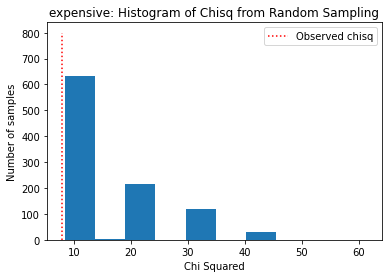

In [58]:
plt.hist(sample_chisq_values)
plt.vlines(obs_chisq,0,800, color='red', linestyles=':', label='Observed chisq')
plt.title(f'{key}: Histogram of Chisq from Random Sampling')
plt.xlabel('Chi Squared')
plt.ylabel('Number of samples')
plt.legend()

Our chi_sq of `obs_chi` is well outside the distribution of randomly-sampled expected values, and so not significantly different. For this reason, the word `trucks` was not used significantly more or less than expected in high or low-value questions.

In [59]:
p_value = sum(pd.Series(sample_chisq_values) > obs_chisq)/len(sample_chisq_values)
if p_value <= 0.1:
    print(f"The p value is {p_value} which is <= 0.1")
else:
    print(f"The p value is {p_value} which is > 0.1")

The p value is 1.0 which is > 0.1


2% of the `sample_chisq_values` are greater than our observed chisq value, so the p-value is 0.02 and thus statistically significant.

In other words, there is a statistically significant difference in the use of the word in a high or low value question.

_____________________________________________

# Playing with ChiSq

From Dataquest, Step 5 mission 4

## Manual

In [60]:
# Number of observed people, by gender, in Town A
df = pd.DataFrame({
    'male':[21790],
    'female':[10771]
})

In [61]:
df

,male,female
0,21790,10771


In [62]:
observed = [df.loc[0,'male'],df.loc[0,'female']]
total = df.sum(axis=1)[0]
expected = [total/2, total/2]

In [63]:
print(f'''
observed: {observed}
expected: {expected}
total: {total}
''')


observed: [21790, 10771]
expected: [16280.5, 16280.5]
total: 32561



__Question:__ Is there a significant difference between male and female numbers when compared to expected numbers?

In [64]:
def chisq_calc(obs_list,exp_list):
    differences = []
    for i in range(len(obs_list)):
        diff = ((obs_list[i]-exp_list[i])**2)/exp_list[i]
        differences.append(diff)
    return sum(differences)

In [65]:
my_chisq = chisq_calc(observed, expected)

In [66]:
my_chisq

3728.950615767329

In [67]:
chi_values = []
for i in range(1000):
    my_matrix = np.random.random(total)
    my_matrix[my_matrix < 0.5] = 0
    my_matrix[my_matrix >= 0.5] = 1
    
    male_count = (my_matrix == 0).sum()
    female_count = (my_matrix == 1).sum()
    
    obs = [male_count, female_count]
    chi_values.append(chisq_calc(obs, expected))

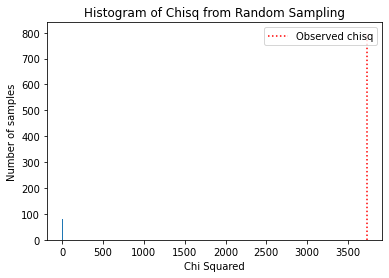

In [68]:
plt.hist(chi_values)
plt.vlines(my_chisq,0,800, color='red', linestyles=':', label='Observed chisq')
plt.title(f'Histogram of Chisq from Random Sampling')
plt.xlabel('Chi Squared')
plt.ylabel('Number of samples')
plt.legend()

In [69]:
p_value = sum(pd.Series(chi_values) > my_chisq)/len(chi_values)
if p_value <= 0.05:
    print(f"The p value is {p_value} which is <= 0.05")
else:
    print(f"The p value is {p_value} which is > 0.05")

The p value is 0.0 which is <= 0.05


## Scipy

In [70]:
from scipy.stats import chisquare

In [71]:
observed

[21790, 10771]

In [72]:
expected

[16280.5, 16280.5]

In [73]:
chisq, p_value = chisquare(observed, expected)

print(f"The chisquare statistic for this set is {round(chisq,2)}, with a p value of {p_value}")

The chisquare statistic for this set is 3728.95, with a p value of 0.0


# From Dataquest:

Here are some potential next steps:

* Find a better way to eliminate non-informative words than just removing words that are less than `6` characters long. Some ideas:
    * Manually create a list of words to remove, like `the`, `than`, etc.
    * Find a list of stopwords to remove.
    * Remove words that occur in more than a certain percentage (like `5%`) of questions.
* Perform the chi-squared test across more terms to see what terms have larger differences. This is hard to do currently because the code is slow, but here are some ideas:
    * Use the apply method to make the code that calculates frequencies more efficient.
    * Only select terms that have high frequencies across the dataset, and ignore the others.
* Look more into the `Category` column and see if any interesting analysis can be done with it. Some ideas:
    * See which categories appear the most often.
    * Find the probability of each category appearing in each round.
* Use the whole Jeopardy dataset (available here) instead of the subset we used in this mission.
* Use phrases instead of single words when seeing if there's overlap between questions. Single words don't capture the whole context of the question well.

We recommend creating a Github repository and placing this project there. It will help other people, including employers, see your work. As you start to put multiple projects on Github, you'll have the beginnings of a strong portfolio.